In [16]:
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/domain1_train.json', 'r') as file:
   domain1_data = [json.loads(line) for line in file]

with open('C:/Users/agkat/Documents/College/1. SML/A1/domain2_train.json', 'r') as file:
    domain2_data = [json.loads(line) for line in file]

# Combine the data from both domains
combined_data = domain1_data + domain2_data

In [12]:

# Split the combined data into training and validation sets
train_data, val_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Print the number of instances in each set
print("Number of instances in training set:", len(train_data))
print("Number of instances in validation set:", len(val_data))

Number of instances in training set: 27520
Number of instances in validation set: 6880


In [110]:
print(train_data[1])

{'text': [2, 1141, 8, 15, 0, 6, 2, 2041, 6, 2447, 4840, 1879, 61, 2, 2012, 6, 1124, 0, 12, 17, 778, 4, 122, 13, 0, 1], 'label': 0}


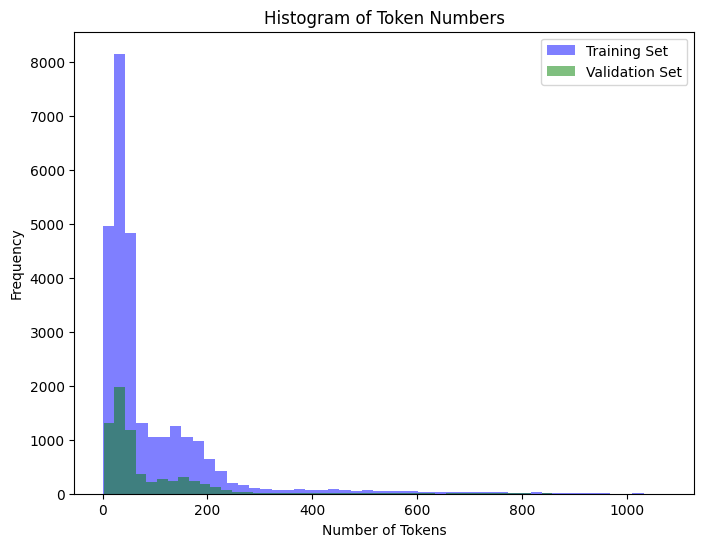

In [21]:
train_token_counts = [len(instance['text']) for instance in train_data]
val_token_counts = [len(instance['text']) for instance in val_data]

# Plot a histogram of token numbers
plt.figure(figsize=(8, 6))
plt.hist(train_token_counts, bins=50, alpha=0.5, color='blue',
label='Training Set')
plt.hist(val_token_counts, bins=50, alpha=0.5, color='green',
label='Validation Set')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Token Numbers')
plt.legend()
plt.show()

In [41]:
# Separate the text and labels from the training set
train_texts = [instance['text'] for instance in train_data]
train_labels = [instance['label'] for instance in train_data]


In [43]:
# Create separate lists of token counts for each label
label0_token_counts = [len(text) for text, label in zip(train_texts,
train_labels) if label == 0]
label1_token_counts = [len(text) for text, label in zip(train_texts,
train_labels) if label == 1]


In [56]:
num_0s = len([i for i in train_labels if i==0])
num_1s = len([i for i in train_labels if i==1])
print(num_0s, num_1s)

18011 9509


In [59]:
18011/8509; 6/4

1.5

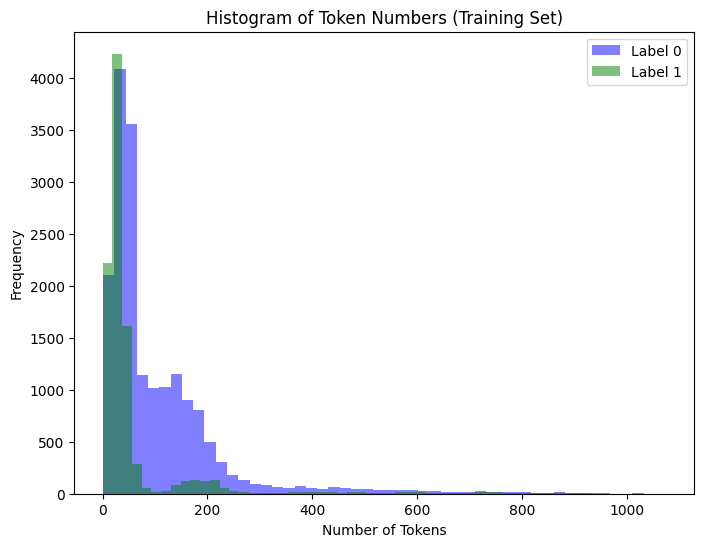

In [45]:

# Plot histograms of token counts for each label
plt.figure(figsize=(8, 6))
plt.hist(label0_token_counts, bins=50, alpha=0.5, color='blue',
label='Label 0')
plt.hist(label1_token_counts, bins=50, alpha=0.5, color='green',
label='Label 1')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Token Numbers (Training Set)')
plt.legend()
plt.show()

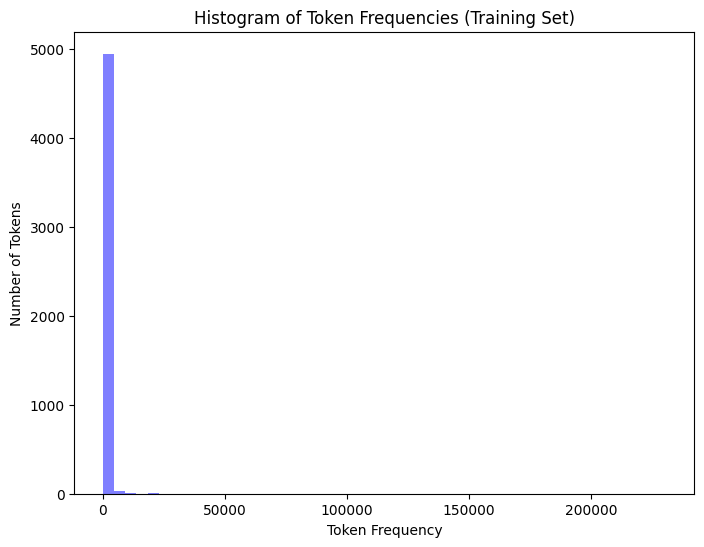

In [50]:
from collections import Counter

# Combine all the text from training instances
all_tokens = [token for instance in train_data for token in
instance['text']]

# Count the occurrences of each token
token_counts = Counter(all_tokens)

# Get the token frequencies
token_frequencies = list(token_counts.values())

# Plot the histogram of token frequencies
plt.figure(figsize=(8, 6))
plt.hist(token_frequencies, bins=50, alpha=0.5, color='blue')
plt.xlabel('Token Frequency')
plt.ylabel('Number of Tokens')
plt.title('Histogram of Token Frequencies (Training Set)')
plt.show()

In [107]:
from collections import Counter

label0_token_counts = Counter()
label1_token_counts = Counter()

for text, label in zip(train_texts, train_labels):
  if label == 0:
      label0_token_counts.update(text)
  elif label == 1:
      label1_token_counts.update(text)



In [103]:
for i in range(0, 15):
    label0_token_counts.pop(i, None)
    label1_token_counts.pop(i, None)

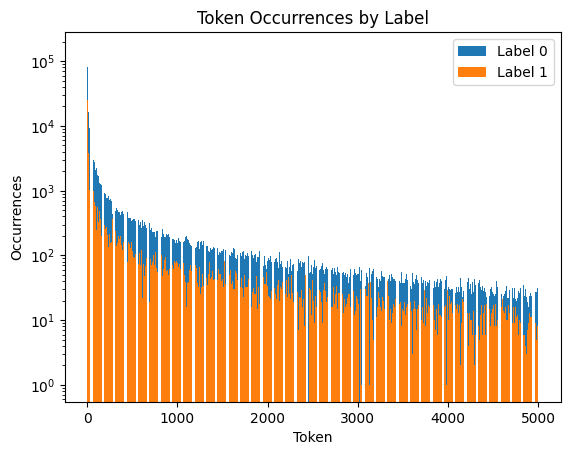

In [108]:
# Plot for label 0
plt.bar(label0_token_counts.keys(), label0_token_counts.values(),
label='Label 0')

# Plot for label 1
plt.bar(label1_token_counts.keys(), label1_token_counts.values(),
label='Label 1')

# Customize the plot
plt.xlabel('Token')
plt.ylabel('Occurrences')
plt.title('Token Occurrences by Label')

# Set logarithmic scale
plt.yscale('log')

plt.legend()


# Add a dot where the bar ends
#for key, value in label0_token_counts.items():
#  plt.plot(key, value, 'ro')
#for key, value in label1_token_counts.items():
#  plt.plot(key, value, 'ro')

# Show the plot
plt.show()

In [97]:
label1_token_counts[15]

4584

In [87]:
start_key = 0
end_key = 5

label0_token_counts_range = {key: value for key, value in
label0_token_counts.items() if start_key <= key <= end_key}
label1_token_counts_range = {key: value for key, value in
label1_token_counts.items() if start_key <= key <= end_key}


In [88]:
label0_token_counts_range

{5: 43631, 2: 109282, 1: 128312, 4: 49162, 0: 154555, 3: 81565}

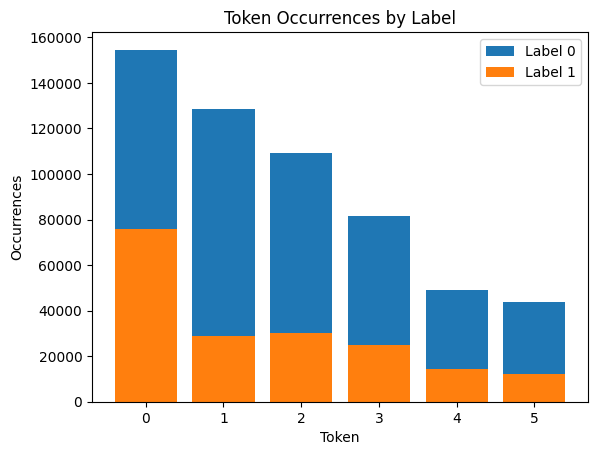

In [90]:
# Plot for label 0
plt.bar(label0_token_counts_range.keys(), label0_token_counts_range.values(),
label='Label 0')

# Plot for label 1
plt.bar(label1_token_counts_range.keys(), label1_token_counts_range.values(),
label='Label 1')

# Customize the plot
plt.xlabel('Token')
plt.ylabel('Occurrences')
plt.title('Token Occurrences by Label')
plt.legend()

# Show the plot
plt.show()